# 行空板之板载资源控制

行空板内置了单片机，采用串口方式和主芯片连接，借助pinpong库即可实现传感和控制。为考虑方便教学，行空板自身已经整合了一些常用的传感器和执行器。

板载资源引脚说明：
- 板载LED：P25
- 蜂鸣器：P26
- 按钮A：P27
- 按钮B：P28
- 光线：P29

说明：在pinpong中，可以用P25，也可以用D25。

## 1.导入库

In [1]:
from pinpong.board import Board,Pin

不需要指定板子类型，也能自动识别。

In [2]:
Board().begin()


  ___________________________
 |                           |
 |      PinPong v0.4.7       |
 |    Designed by DFRobot    |
 |___________________________|
 
[01] Python3.7.3 Linux-4.4.143-67-rockchip-g01bbbc5d1312-aarch64-with-debian-10.11 Board: UNIHIKER
selected -> board: UNIHIKER serial: /dev/ttyS3
[10] Opening /dev/ttyS3
[32] Firmata ID: 3.0
[22] Arduino compatible device found and connected to /dev/ttyS3
[40] Retrieving analog map...
[42] Auto-discovery complete. Found 30 Digital Pins and 30 Analog Pins
------------------------------
All right. PinPong go...
------------------------------



## 2.控制板载LED的状态

板载LED在背面，Power灯旁边。

In [ ]:
led = Pin(Pin.P25,Pin.OUT)

In [ ]:
led.write_digital(1)

In [ ]:
led.write_digital(0)

In [ ]:
# 循环执行10轮闪烁Led
import time
i=0
while i<10:
    led.write_digital(1)
    time.sleep(1)
    led.write_digital(0)
    time.sleep(1)   
    i = i+1

如果想用PWM方式控制LED，需要在支持PWM的引脚上接LEd灯，如21-23。PWM方式可以让LED输出不同的明暗状态，数值在0-255之间，0关闭，255为最亮。

In [ ]:
# 参考代码
led = Pin(Pin.P23,Pin.PWM)
led.write_analog(255)
led.write_analog(0)
led.write_analog(128)

## 3.读取按钮信息

按钮和B，分别接在P27和P28。按下为0，默认是1。

In [ ]:
a = Pin(Pin.P27,Pin.IN)
b = Pin(Pin.P28,Pin.IN)

In [ ]:
# 循环读取10次的按钮状态
import time
i=0
while i<10:
    print("按钮A的状态：" + str(a.read_digital()))
    print("按钮B的状态：" + str(b.read_digital()))
    time.sleep(1)   
    i = i+1

## 4.读取光线信息

光线传感器接在P29，数值在0-4095之间。

In [ ]:
g = Pin(Pin.P29,Pin.ANALOG)

In [ ]:
# 循环读取10次的光线状态
import time
i=0
while i<10:
    print("光线值：" + str(g.read_analog()))
    time.sleep(1)   
    i = i+1

## 5.控制蜂鸣器

蜂鸣器在行空板的26口，需要用PWM方式驱动。

In [ ]:
from pinpong.board import Pin
buzzer= Pin(Pin.D26,Pin.PWM)

In [ ]:
buzzer.write_analog(1)

In [ ]:
buzzer.write_analog(200)

In [ ]:
buzzer.write_analog(0)

In [ ]:
# 当光线值高于1000，就用蜂鸣器发出警报
g = Pin(Pin.P29,Pin.ANALOG)
while True:
    t = g.read_analog()
    if t>1000:
        buzzer.write_analog(200)
    else:
        buzzer.write_analog(0)

## 5.读取加速度传感器

行空板的加速度传感器使用I2C方式接入，使用读取数值需要导入pinpong库中的“extension.unihiker”包中所有模块。

GD32Sensor_acc”类中的“get_x()”、 “get_y()”、“get_z()”三个方法可以分别获取 x/y/z 三个方向的加速度值，并且由于在文件中已经对该类进行过实例化生成了一个 accelerometer 对象，因此，我们在使用时，可以直接通过 “accelerometer.get_x()”/“accelerometer.get_y()”/“accelerometer.get_z()”指令来获取各自方向的加速度值。

In [ ]:
from pinpong.extension.unihiker import * # 导入pinpong.extension.unihiker包中所有模块
x = accelerometer.get_x() # 获取x轴加速度值
y = accelerometer.get_y() # 获取y轴加速度值
print(x,y)

In [ ]:
# 循环读取10次的加速度传感器的数值
import time
i=0
while i<10:
    print("x：" + str(accelerometer.get_x()))
    print("y：" + str(accelerometer.get_y()))
    print("z：" + str(accelerometer.get_z()))
    time.sleep(1)   
    i = i+1

## 6.行空板资源说明

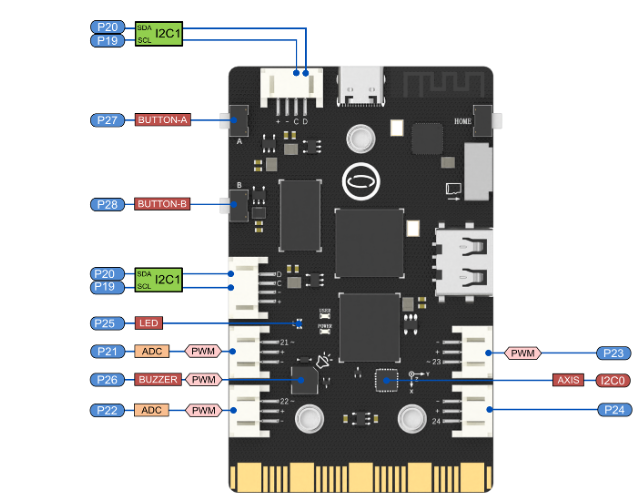